In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [6]:
fish_data = np.column_stack((fish_length, fish_weight))
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [7]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [8]:
# 훈련셋 테스트셋 나누기
from sklearn.model_selection import train_test_split

In [9]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [10]:
# 훈련데이터가 적거나 특정 클래스의 샘플개수가 적을때 유용한 stratify매개변수 이용 
# 왜냐면 위에꺼 대로 진행 시, 샘플링 편향이 나타났음 (35:14로 2.5:1이었지만 테스트 세트의 도미와 빙어의 비율은 3.3:1임)
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target ,random_state=42)

In [11]:
print(test_target)
# 2.5:1로 테스트 세트의 비율이 잘 맞춰졌음 -> 샘플링 편향이 사라짐

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
# k-최근접 이웃을 훈련하기
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [16]:
print(kn.predict([[25, 150]]))

# 띠용? 원래 1이 나와야 하는데?

[0.]


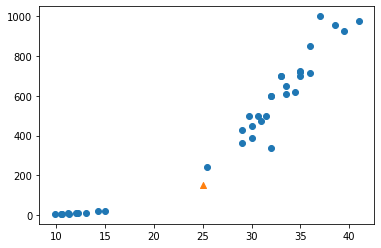

In [17]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.show()

# 왼쪽 군집이 빙어(0) 오른쪽 군집이 도미(1)

In [20]:
distances, indexes = kn.kneighbors([[25, 150]])
print(distances, indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


In [23]:
train_input[indexes, 1]

array([[242. ,  19.9,  19.7,  12.2,  12.2]])

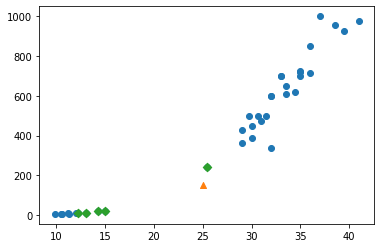

In [21]:
plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(25, 150, marker="^")

# x축은 train_input[indexes,0]이고 y축은 train_input[indexes, 1]임 그래서 2개를 넣은거지ㅇㅇ
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker="D")

plt.show()

In [26]:
# 타깃데이터로 확인하면 왜 25,150을 빙어로 분류하는지 더 명확히 알 수 있음

print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


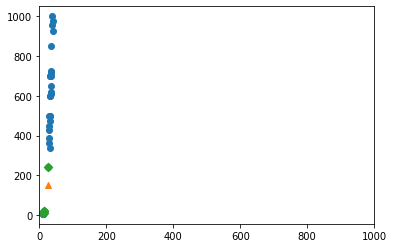

In [28]:
#xy축 비율을 맞춰줌 -> 데이터 전처리 작업

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker="D")
plt.xlim((0, 1000))
plt.show()



In [31]:
# 전처리

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [32]:
train_scaled = (train_input - mean) / std

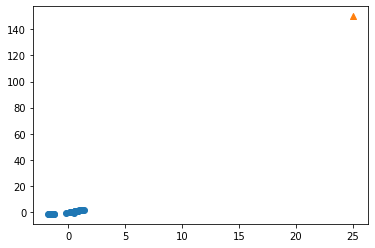

In [33]:
# 전처리 데이터로 모델 훈련하기
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker = "^")
plt.show()

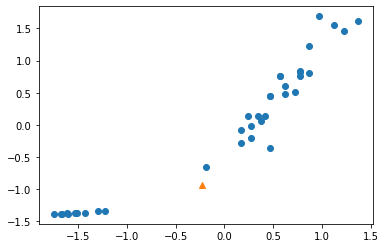

In [35]:
new = ([25, 150] - mean) / std
# 전처리 데이터로 모델 훈련하기
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = "^")
plt.show()

In [37]:
kn.fit(train_scaled, train_target)


KNeighborsClassifier()

In [39]:
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [40]:
print(kn.predict([new]))

[1.]


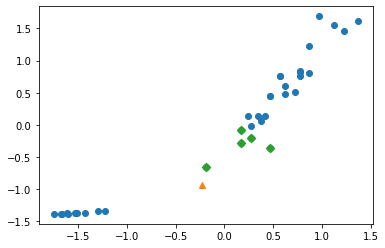

In [41]:
distance, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker="D")
plt.show()